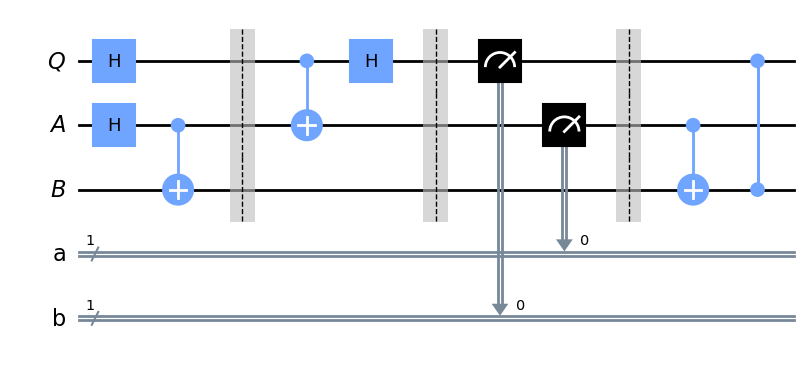

In [1]:
"""   Quantum Teleportation """

"Teleporting the information of qubit Q: 1/√2(|0⟩+ |1⟩) to qubit B = |0⟩ "

#Importing some libraries to encod Teleportation Circuit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

"qubits"
Qbit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')   #ebit stands for Entangled bit
ebit1 = QuantumRegister(1, 'B')

"Cbits"
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

# A class in which Quantum circuit of teleportation is Coded
class Teleportation_Circuit:
    
    #Initiallizing Qbits and Cbits
    def __init__(self, Qbit, ebit0, ebit1, a, b):
        self.Qbit = Qbit
        self.ebit0 = ebit0
        self.ebit1 = ebit1
        self.a = a
        self.b = b
    

        self.qc = QuantumCircuit(self.Qbit, self.ebit0, self.ebit1, self.a, self.b)

        self.qc.h(self.Qbit)   #  Plus state creation

        "Creating Entangled State of A and B"
        self.qc.h(self.ebit0)
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.barrier()    
        
        "Applying CNOT to 'A' state using Qbit as  Control"
        self.qc.cx(Qbit, ebit0)
        self.qc.h(Qbit)
        self.qc.barrier()     
        
        'Measuring Qbits to classical bits'
        self.qc.measure(self.Qbit, self.b)
        self.qc.measure(self.ebit0, self.a)
        self.qc.barrier()
        
        "Apply CNOT and CZ gates on ebit1"
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.cz(self.Qbit, self.ebit1)
    
    #To print the state of ebit1 after Teleportation proccess
    def Print_state(self):
        self.simulator = Aer.get_backend('statevector_simulator')
        self.result = execute(self.qc, backend = self.simulator).result()
        self.statevector = self.result.get_statevector(self.qc)
        return Statevector(self.statevector)
    
    def Q_C_Returned(self):
        return self.qc
    
    "Attribute for drawing histogram of Qbits Probability maganitude"
    def Histogram(self):
        simulator = Aer.get_backend('qasm_simulator')
        result = execute(self.qc, backend = simulator, shots = 1024).result()
        counts = result.get_counts(self.qc)
        return plot_histogram(counts)



#Calling the class Teleportation_Circuit here        
Q_Circuit = Teleportation_Circuit(Qbit, ebit0, ebit1, a, b)

# Drawing the circuit
Q_Circuit.Q_C_Returned().draw(output='mpl')

# "call the attribute Histogram of Class Teleportation Circuit"
# Q_Circuit.Histogram()

# Printing the Quantum at the end
# Q_Circuit.Print_state()

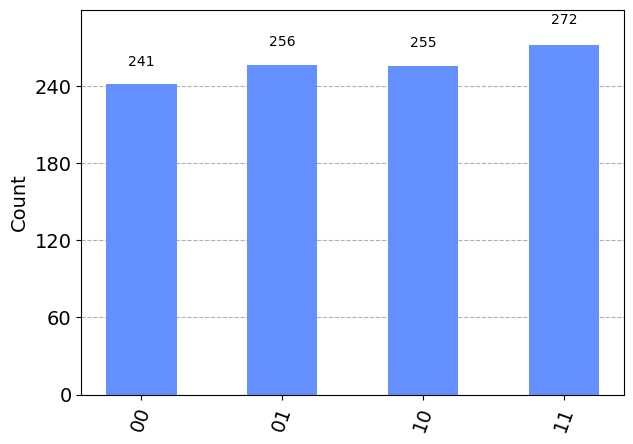

In [18]:
"Another simple Teleportation"
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

class Teleportation:
    def __init__(self):
        self.qc = QuantumCircuit(3, 2)
        self.qc.h(0)  # Creating Qbit that is to be teleported
        
        'Creating Entangled state'
        self.qc.h(1)
        self.qc.cx(1, 2)
        self.qc.barrier()
        
        self.qc.cx(0, 1)  # Applying CNOT to Alice's Qbit 
        self.qc.h(0)
        self.qc.barrier()
        
        self.qc.measure(0, 0)
        self.qc.measure(1, 1)
        self.qc.barrier()
        
        
        "Bob's Operations "
        self.qc.cx(1, 2)
        self.qc.cz(0, 2)
        
    def Circuit(self):
        return self.qc.draw(output='mpl')
        
    def Simulator(self):
        simulator = AerSimulator()
        counts = simulator.run(self.qc, shots = 1024).result().get_counts()
        return plot_histogram(counts)

Tel = Teleportation()
Tel.Circuit()
Tel.Simulator()
        
        